In [1]:
import sys
sys.path.append('../') # to import from previous dir folders

import gymnasium as gym
import random

# importing functions from utils
from helpers.loggers import logger
import helpers.utils as utils
import helpers.agents as agents

# To allow auto reload to this notebook after modifying any external file imported
%load_ext autoreload
%autoreload 2

In [2]:
env = gym.make("Taxi-v3", render_mode="ansi")

# seed random generators and the environment to replicate results
utils.seed(42, env)

In [3]:
agent = agents.RandomAgent(env)

Using a single episod

In [4]:
# defining and keeping track of values
penalties = agents.Value(data=0, label='penalties')
total_rewards = agents.Value(data=0, label='penalties')
epochs = agents.Value(data=0, label='epochs')

# both terminated, truncated are returned on every step
terminated, truncated = False, False

# reset the environment if you run this block
obs, info = env.reset()
utils.show_state(0, env, obs, 0)

# training loop
while not ((terminated) or (truncated)):
    # get the action value
    action = agent.get_action()

    # take a step towards the solution
    obs, reward, terminated, truncated, info = env.step(action)

    # keep track of values
    total_rewards += reward

    if reward == -10:
        penalties += reward
    
    epochs += 1

    # show current state
    # utils.show_state(epochs, env, obs, reward)
    # print(reward, total_rewards, penalties, terminated, truncated, epochs.data)
    
    
print("Epochs taken: {}".format(epochs.data))
print("Penalties incurred: {}".format(penalties.data))

utils.show_state(epochs.data, env, obs, total_rewards.data)

Step 0: [2, 1, 2, 3], Reward: 0
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+


Epochs taken: 200
Penalties incurred: -690
Step 200: [2, 3, 2, 3], Reward: -821
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)



Using multiple episods

In [5]:
n_episodes = agents.Value(data=10000, label='n_Episodes')

# For plotting metrics
epochs_per_episode = []
penalties_per_episode = []


for episode in range(n_episodes.data):
    # defining and keeping track of values
    penalties = agents.Value(data=0, label='penalties')
    total_rewards = agents.Value(data=0, label='penalties')    
    epochs = agents.Value(data=0, label='epochs')
    
    # both terminated, truncated are returned on every step
    terminated, truncated = False, False
    
    # reset the environment
    obs, info = env.reset()

    # training loop
    while not ((terminated) or (truncated)):
        # get the action value
        action = agent.get_action()

        # take a step towards the solution
        obs, reward, terminated, truncated, info = env.step(action)
    
        # keep track of values
        total_rewards += reward
        if reward == -10:
            penalties += reward
        
        epochs += 1
        # logger.info(f"Episode {_ + 1}: Length = {epochs.data}, Terminated = {terminated}, Truncated = {truncated}")

    
    epochs_per_episode.append(epochs.data)
    penalties_per_episode.append(penalties.data)


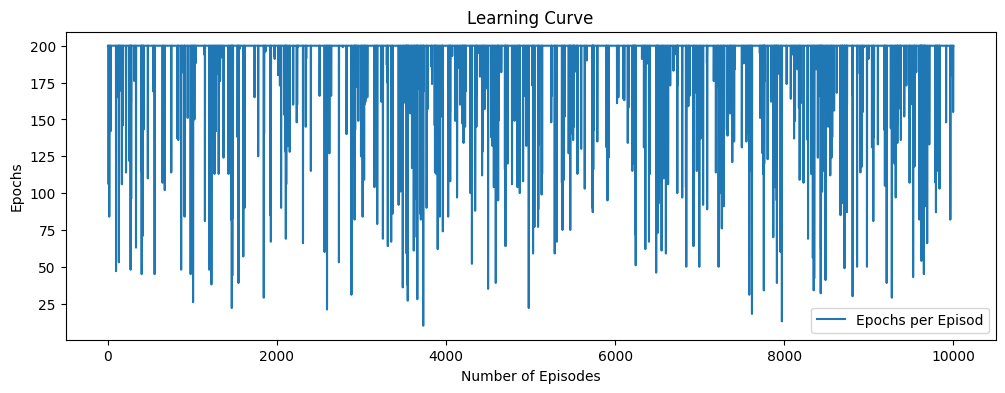

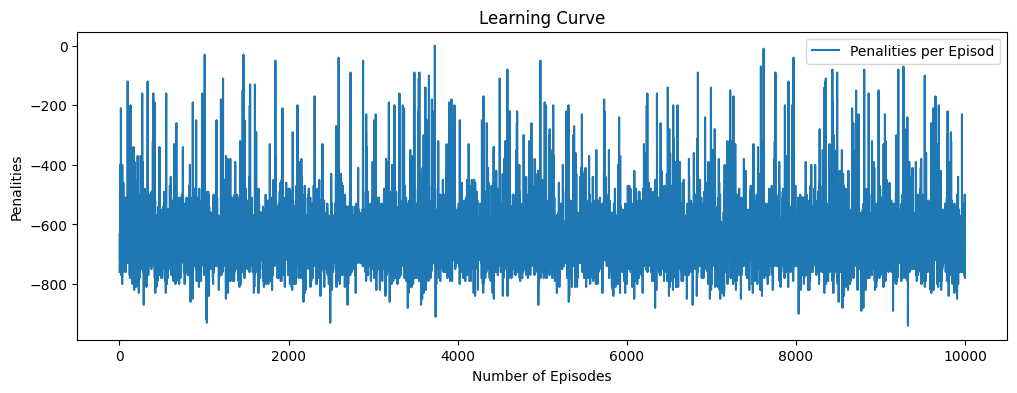

In [6]:
utils.plot_learning(list(range(1, n_episodes.data + 1)), epochs_per_episode, legend_title='Epochs per Episod', ylabel='Epochs')
utils.plot_learning(list(range(1, n_episodes.data + 1)), penalties_per_episode, legend_title='Penalities per Episod', ylabel='Penalities')

#### Let's test visually!

In [7]:
agent.test()

Step 0: [0, 1, 3, 0], Reward: 0
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+


Step 1: [0, 1, 3, 0], Reward: -10
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)

Step 2: [0, 1, 3, 0], Reward: -10
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

Step 3: [0, 0, 3, 0], Reward: -1
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)

Step 4: [1, 0, 3, 0], Reward: -1
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)

Step 5: [1, 0, 3, 0], Reward: -10
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

Step 6: [0, 0, 3, 0], Reward: -1
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)

Step 7: [0, 1, 3, 0], Reward: -1
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+-

As expected, the random agent entirely failed, and loop truncated after maximum epoch iterations.